In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

According to metrics, the CO2 emissions in the Western countries has fallen, therefore we're considered to have made environmental progress globally.

However, we don't have a Western warming. We have a Global warming and there are lots of critics that claim that the CO2 emissions haven't fallen, but rather transferred in other parts of the world. Let's examine if that's true.
Our data is taken from the [ourworldindata website](https://ourworldindata.org/co2-emissions)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

In [3]:
data

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,47.5,3385.574,1.889
25187,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,NaN,NaN,NaN
25188,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,NaN,NaN,NaN
25189,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


In [4]:
#First, we fix the names for working more efficiently.
data = data.replace(' ', '_', regex=True)
#Then, we take the columns that we are interested in
df= pd.DataFrame({'country': data['country'], 'year':data['year'], 'co2':data['co2'], 'co2_per_capita':data['co2_per_capita']})
#Let's remove the nan values
df = df.dropna()
df.index = np.arange(0, len(df))
df.head()

,country,year,co2,co2_per_capita
0,Afghanistan,1949,0.015,0.002
1,Afghanistan,1950,0.084,0.011
2,Afghanistan,1951,0.092,0.012
3,Afghanistan,1952,0.092,0.012
4,Afghanistan,1953,0.106,0.013


Now we'll be moving to graphs. Due to the fact that we have a lot of countries to examine, we'll use a function in order to make our job quicker. Our function will create a temporary dataframe for the countries that we want to examine.

In [5]:
def t_df(country, emissions='co2'):
    lista = []
    #This is in case we want to examine only one country or a category.
    if type(country) == str:
        #cm = df.loc[df['country']==country]
        #cm.rename(columns={emissions:country}, inplace=True)
        #cm.index = cm['year']
        #cm.drop(columns = ['country', 'year'], inplace = True)
        x = df.loc[df['country']==country]
        x.index=x['year']
        cm = pd.DataFrame({country:x[emissions]})
        #cm.dropna()
    elif type(country) == list:
        #This is in case we want to examine only one country or a category and we
        #put it as a list with one element
        if len(country) == 1:
            country = country[0]
            x = df.loc[df['country']==country]
            x.index=x['year']
            cm = pd.DataFrame({country:x[emissions]})
        else:
            #This is in case we want to examine multiple countries
            #or categories at once.
            cm = pd.DataFrame()
            for i in country:
                c = df.loc[df['country']== i]
                c.rename(columns={emissions: i}, inplace=True)
                #Here we set the year column as the index
                #and then we drop the NaNs.
                #That way the measurements will only be when both of the countries or
                #categories are measured.
                c[i].index = c['year']
                lista.append(c[i])
            cm = pd.concat(lista, axis=1)
            cm = cm.dropna()
    return cm

In [7]:
df.loc[df['country']=='China']

,country,year,co2,co2_per_capita
4338,China,1899,0.095,0.000
4339,China,1902,0.095,0.000
4340,China,1903,1.964,0.005
4341,China,1904,2.088,0.005
4342,China,1905,2.297,0.006
...,...,...,...,...
4453,China,2016,9720.444,6.874
4454,China,2017,9920.459,6.981
4455,China,2018,10289.990,7.208
4456,China,2019,10489.989,7.316


In [8]:
#Now let's check our function
tdf = t_df(['Afghanistan', 'World', ])
tdf.head()

C:\Users\andri\AppData\Local\Temp\ipykernel_5636\2806443583.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.rename(columns={emissions: i}, inplace=True)
C:\Users\andri\AppData\Local\Temp\ipykernel_5636\2806443583.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.rename(columns={emissions: i}, inplace=True)


,Afghanistan,World
year,,
1949,0.015,5243.103
1950,0.084,6003.238
1951,0.092,6379.756
1952,0.092,6465.694
1953,0.106,6647.728


Great! The measurements begin the year when Afghanistan's measurements begin. Let's proceed.

Now, here comes the question, which countries are considered to be 'the West'?

Some might say that the West is consisted the countries that were under the Western sphere of influence during the cold war. However, the first international conference was held in Rio in 1992, while the iron curtain fell in 1991 and since then, lots have changed. 

So, what is the West?

Although there are various definitions, we'll prefter that definition given by the [worldatlas](https://www.worldatlas.com/articles/list-of-western-countries.html) where the West is the countries of the EU, the UK, the US, Australia, New Zealand and the non EU countries that are in the Schengen agreement(Norway, Iceland, Lichtenstain and Switzerland). Although, we should also include the microstates such as Vatican and San Marino since both contribute to the European emissions, they appear to not hava any measurements and Lichtenstein isn't anywhere to be found in our data since their emissions are so small because they buy their energy from other states(mainly electricity), so technically the emissions that they cause through their consumption are counted on their electricity providers. So, their CO2 emission measurements aren't lost. They just "don't take the blame" for them.

In order to do that, we will use our function in order to create a dataframe of the countries of the West and then, we'll take their total CO2 emissions.

In [9]:
west = t_df(['EU-28', 'United_Kingdom', 'Australia', 'New_Zealand', 'Norway', 'Iceland', 'Switzerland', 'United_States'])
west

C:\Users\andri\AppData\Local\Temp\ipykernel_5636\2806443583.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.rename(columns={emissions: i}, inplace=True)
C:\Users\andri\AppData\Local\Temp\ipykernel_5636\2806443583.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.rename(columns={emissions: i}, inplace=True)
C:\Users\andri\AppData\Local\Temp\ipykernel_5636\2806443583.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.rena

,EU-28,United_Kingdom,Australia,New_Zealand,Norway,Iceland,Switzerland,United_States
year,,,,,,,,
1936,1537.605,453.796,27.049,4.176,10.441,0.022,9.920,1713.350
1937,1687.957,468.131,28.855,4.381,11.760,0.018,10.464,1792.546
1940,1795.465,475.144,29.038,4.759,6.510,0.033,8.311,1874.914
1941,1771.006,469.652,34.545,5.000,4.813,0.026,6.625,2043.496
1943,1786.476,454.820,34.990,5.371,5.443,0.018,6.172,2271.985
...,...,...,...,...,...,...,...,...
2016,3495.042,399.337,415.945,34.305,44.800,3.487,39.193,5248.024
2017,3507.594,387.565,414.751,35.855,44.372,3.605,38.183,5207.751
2018,3427.978,381.890,416.001,35.789,44.469,3.663,36.868,5375.491


In [10]:
Series = west['EU-28'].copy()
west['West'] = 0
for i in west.columns:
    Series += west[i]
Series = Series - west['EU-28']
west['West'] = Series
west

,EU-28,United_Kingdom,Australia,New_Zealand,Norway,Iceland,Switzerland,United_States,West
year,,,,,,,,,
1936,1537.605,453.796,27.049,4.176,10.441,0.022,9.920,1713.350,3756.359
1937,1687.957,468.131,28.855,4.381,11.760,0.018,10.464,1792.546,4004.112
1940,1795.465,475.144,29.038,4.759,6.510,0.033,8.311,1874.914,4194.174
1941,1771.006,469.652,34.545,5.000,4.813,0.026,6.625,2043.496,4335.163
1943,1786.476,454.820,34.990,5.371,5.443,0.018,6.172,2271.985,4565.275
...,...,...,...,...,...,...,...,...,...
2016,3495.042,399.337,415.945,34.305,44.800,3.487,39.193,5248.024,9680.133
2017,3507.594,387.565,414.751,35.855,44.372,3.605,38.183,5207.751,9639.676
2018,3427.978,381.890,416.001,35.789,44.469,3.663,36.868,5375.491,9722.149


Now, we will do the same for Asia. The first climate policies were implemented in 1992. Therefore, we'll take the countries that liberated their economies and started their industialization in the late 1980s and 1990s because when a country is getting industrialized, there is the a huge increase in CO2 emissions and the historically, the Western buiseness people moved their favtories there for cheap labor. Mainly in the East. The main ones are China, India, Vietnam, Uganda, Colombia, Bangladesh, Pakistan, Nigeria, Brasil, Uruguay, Chile and Indonesia. 

Some might say that we should also include the post Soviet countries. However, when the USSR fell, these countries were already industrialized and were emitting a good amount of CO2 emmissions.

Sources: [Factories are no longer the sure route to prosperity. Here's why ](https://www.weforum.org/agenda/2019/08/factories-are-no-longer-the-only-route-to-prosperity-heres-why/)


[Economic liberalization](https://en.wikipedia.org/wiki/Economic_liberalization#Historical_examples)

[Globalization](https://en.wikipedia.org/wiki/Globalization)

[Trade liberalization and poverty in
Bangladesh](https://repository.unescap.org/bitstream/handle/20.500.12870/1431/ESCAP-2008-WP-Trade-liberalization-and-poverty-in-Bangladesh.pdf?sequence=1)

[Globalizing the Rest of the World](https://hbr.org/1991/07/globalizing-the-rest-of-the-world)

[Global Trade Liberalization and the Developing Countries](https://www.imf.org/external/np/exr/ib/2001/110801.htm)

[Economic liberalisation in Pakistan](https://en.wikipedia.org/wiki/Economic_liberalisation_in_Pakistan)

In [11]:
n_df = t_df(['China', 'India','Vietnam', 'Colombia', 'Uganda', 'Bangladesh', 'Pakistan', 'Nigeria','Brazil', 'Uruguay', 'Chile','Indonesia'])
n_df

C:\Users\andri\AppData\Local\Temp\ipykernel_5636\2806443583.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.rename(columns={emissions: i}, inplace=True)
C:\Users\andri\AppData\Local\Temp\ipykernel_5636\2806443583.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.rename(columns={emissions: i}, inplace=True)
C:\Users\andri\AppData\Local\Temp\ipykernel_5636\2806443583.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.rena

,China,India,Vietnam,Colombia,Uganda,Bangladesh,Pakistan,Nigeria,Brazil,Uruguay,Chile,Indonesia
year,,,,,,,,,,,,
1950,78.835,61.177,1.480,7.498,0.106,0.993,5.355,2.257,19.659,2.454,8.451,9.831
1951,102.115,64.100,1.285,8.164,0.139,1.226,6.613,1.685,21.659,2.622,9.982,9.390
1952,127.999,67.509,1.864,8.633,0.143,1.295,6.983,2.180,24.934,3.153,10.604,12.721
1953,133.783,68.789,1.750,10.761,0.209,1.318,7.107,2.437,25.218,3.505,10.403,13.080
1954,160.877,72.500,2.670,9.621,0.220,1.339,7.218,2.572,29.676,3.736,11.080,14.747
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,9720.444,2382.223,192.766,93.242,4.790,76.477,207.019,115.821,492.748,6.520,84.392,560.846
2017,9920.459,2433.856,195.249,86.296,5.374,80.944,233.978,114.043,500.758,6.163,84.046,575.176
2018,10289.990,2599.806,223.718,84.881,5.498,82.600,238.306,127.928,483.685,6.571,84.409,614.884


In [12]:
Series2 = n_df['China'].copy()
n_df['total'] = 0
for i in n_df.columns:
    Series2 += n_df[i]
Series2 = Series2 - n_df['China']
n_df['total'] = Series2

In [13]:
n_df

,China,India,Vietnam,Colombia,Uganda,Bangladesh,Pakistan,Nigeria,Brazil,Uruguay,Chile,Indonesia,total
year,,,,,,,,,,,,,
1950,78.835,61.177,1.480,7.498,0.106,0.993,5.355,2.257,19.659,2.454,8.451,9.831,198.096
1951,102.115,64.100,1.285,8.164,0.139,1.226,6.613,1.685,21.659,2.622,9.982,9.390,228.980
1952,127.999,67.509,1.864,8.633,0.143,1.295,6.983,2.180,24.934,3.153,10.604,12.721,268.018
1953,133.783,68.789,1.750,10.761,0.209,1.318,7.107,2.437,25.218,3.505,10.403,13.080,278.360
1954,160.877,72.500,2.670,9.621,0.220,1.339,7.218,2.572,29.676,3.736,11.080,14.747,316.256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,9720.444,2382.223,192.766,93.242,4.790,76.477,207.019,115.821,492.748,6.520,84.392,560.846,13937.288
2017,9920.459,2433.856,195.249,86.296,5.374,80.944,233.978,114.043,500.758,6.163,84.046,575.176,14236.342
2018,10289.990,2599.806,223.718,84.881,5.498,82.600,238.306,127.928,483.685,6.571,84.409,614.884,14842.276


Now that we made the total, we can make the comparission dataframe in order to visualize what we've gathered.

<AxesSubplot:xlabel='year'>

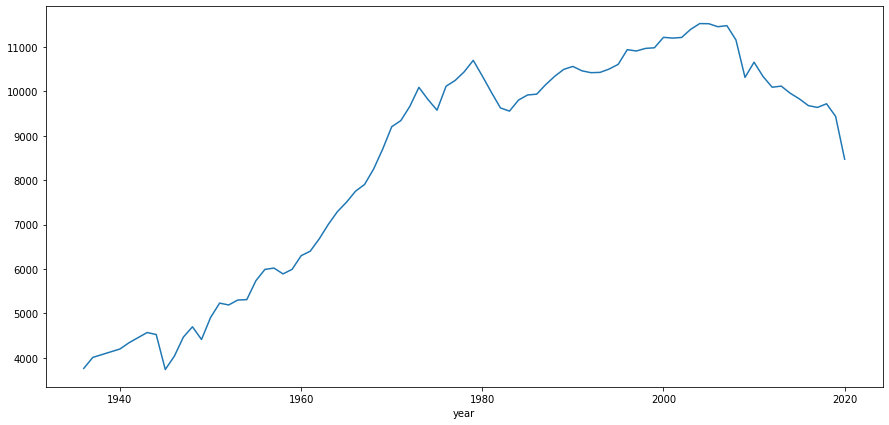

In [14]:
west['West'].plot(figsize = (15, 7))

As we can see, there is a significant drop since the housing crisis. Let's take a closer look beginning in 1997 when the Kyoto protocol took place.

<AxesSubplot:xlabel='year'>

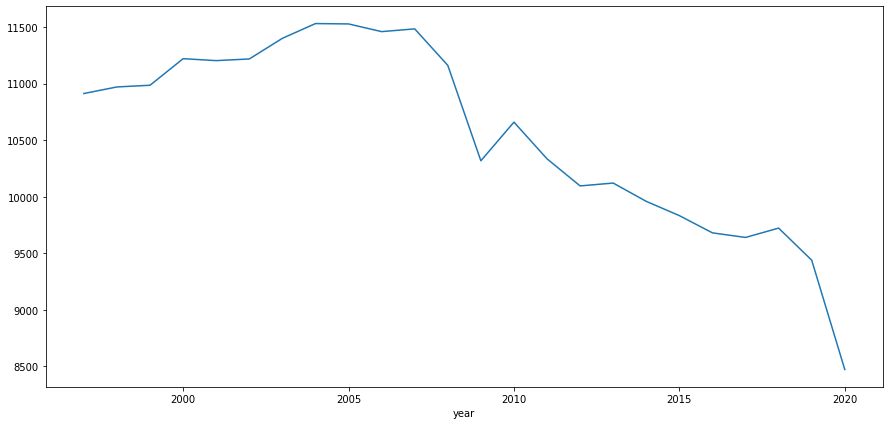

In [15]:
west['West'].loc[west.index >= 1997].plot(figsize = (15, 7))

As we saw in the previous diagram and this diagram, the West had a slow growth until 2007 and then it started falling. The 2007 crisis played difinitely a role since we see the emissions start rising again in 2009 until 2010. in 2009, the first [renewable energy schemes](https://www.europarl.europa.eu/factsheets/en/sheet/70/renewable-energy) were implemented in the EU(UK included) and the US [had already started in 2007](https://web.archive.org/web/20080109180330/http://www.dsireusa.org/library/includes/incentivenew.cfm?&CurrentPageID=3&EE=0&RE=1), but in state level. Norway, New Zealand and Iceland have already had most of their energy through renewables with the former through hydropower and the former in geothermal type thanks to the volcanoes in the area.

Australia has little to no incentives provided by the federal government to promote renewables despite [Western Australia](https://en.wikipedia.org/wiki/Energy_policy_of_Australia) providing strong incentives for going solar. So, we can't take them into account for the reduction.

Now, let's see how the developing world has been doing.

<AxesSubplot:xlabel='year'>

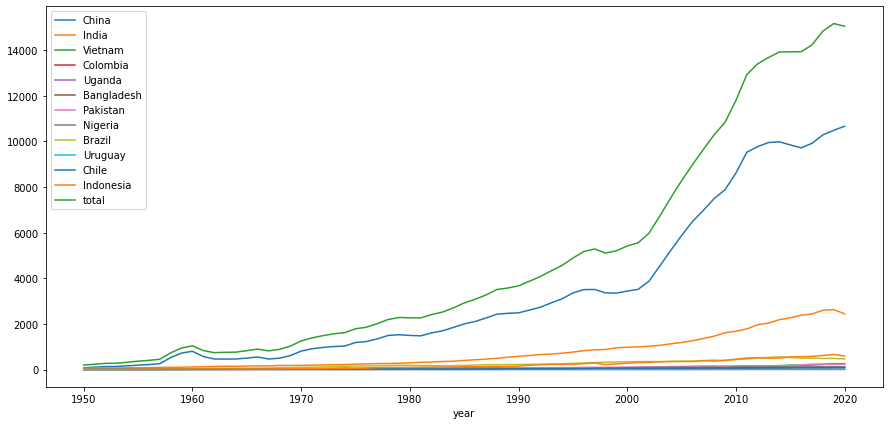

In [16]:
n_df.plot(figsize = (15, 7))

It's very easy to see that the emissions have skyrocketed with China leading the way. China's contribution is so significant that the 'total' line has the same shape with the China's one. 

And despite having a relatively slightly smaller population, India's emissions are pretty low compared to China's, despite being primarily dependent on coal.

<AxesSubplot:xlabel='year'>

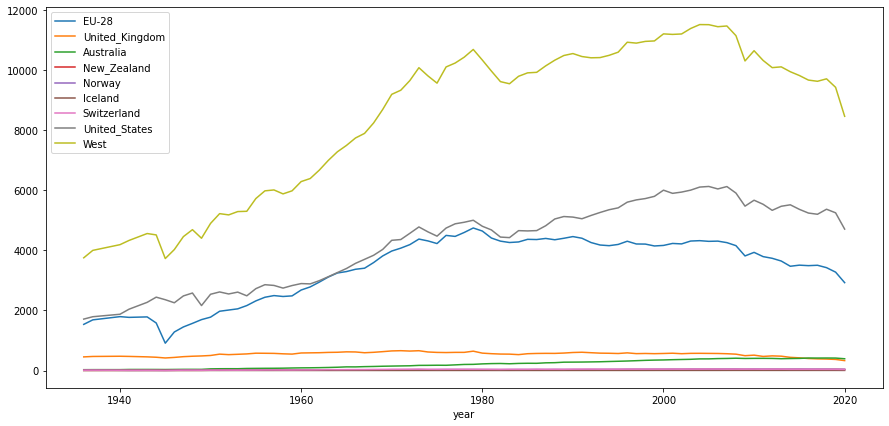

In [17]:
west.plot(figsize =(15, 7))

In the West as we see, the US is the biggest pollutter, but in contrast to the developing countries that we saw above, the US doesn't have such a huge difference with the other western countries.

The effects of the [1979 energy crisis](https://en.wikipedia.org/wiki/1979_oil_crisis) and the [early 1980s recession](https://en.wikipedia.org/wiki/Early_1980s_recession) are very visible. 

The EU along with the UK has had a stagnation of emissions while the US continued to rise until the housing crisis where both started reducing their emissions.

Now let's compare the West with the developing countries.

In [18]:
comp = pd.DataFrame({'West': west['West'], 'Countries': n_df['total']})
comp = comp.dropna()
comp

,West,Countries
year,,
1950,4903.389,198.096
1951,5228.465,228.980
1952,5186.529,268.018
1953,5297.265,278.360
1954,5306.853,316.256
...,...,...
2016,9680.133,13937.288
2017,9639.676,14236.342
2018,9722.149,14842.276


<AxesSubplot:xlabel='year'>

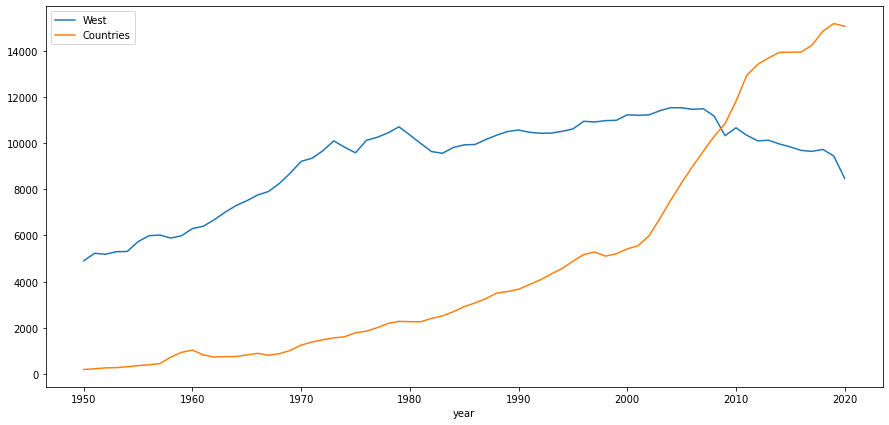

In [19]:
comp.plot(figsize = (15, 7))

As we see, the newly developing countries not only have surpassed the West, but they emit more emissions than when the West was at it's peak. Let's do a comparisson with the top 3 polluters of the developing countries.

C:\Users\andri\AppData\Local\Temp\ipykernel_5636\2852624197.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['total'] = Series


<AxesSubplot:xlabel='year'>

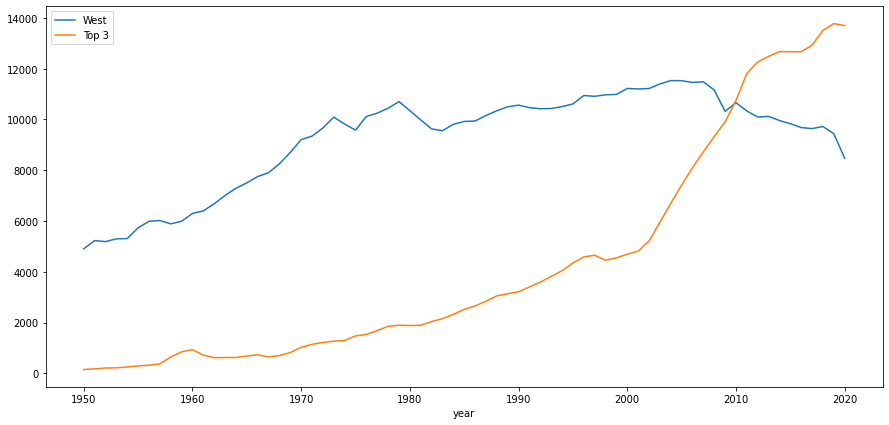

In [20]:
#First, we find them and put the in a dictionary along with their 2019 CO2 emissions.
#Then, we sort the dictionary's values, we make a dataframe of them,
#We find their total emissions, we put them their total in a dataframe with the West
#And then we create the graph.
diction = dict()
lista = []
for i in n_df.columns:
    var = n_df.sort_values(i, ascending=False)    
    diction[i] = var[i].iloc[0]
diction.pop('total')

sorted_diction = sorted(diction.items())
sorted_diction = dict(sorted(diction.items(), key=lambda item: item[1]))
lista = list(sorted_diction.keys())
top3 = n_df[lista[-3:]]

Series = top3[top3.columns[0]].copy()
for i in top3.columns[1:]:
    Series += top3[i]
top3['total'] = Series

comp = pd.DataFrame({'West': west['West'], 'Top 3': top3['total']})
comp = comp.dropna()
comp.plot(figsize = (15, 7))

As we see, the top 3 polluters of the developing world(China, India, Indonesia) contribute approximately 75% more than their counterparts combined, which results of the current graph having little difference with the previous one. Now, let's see with China alone.

<AxesSubplot:xlabel='year'>

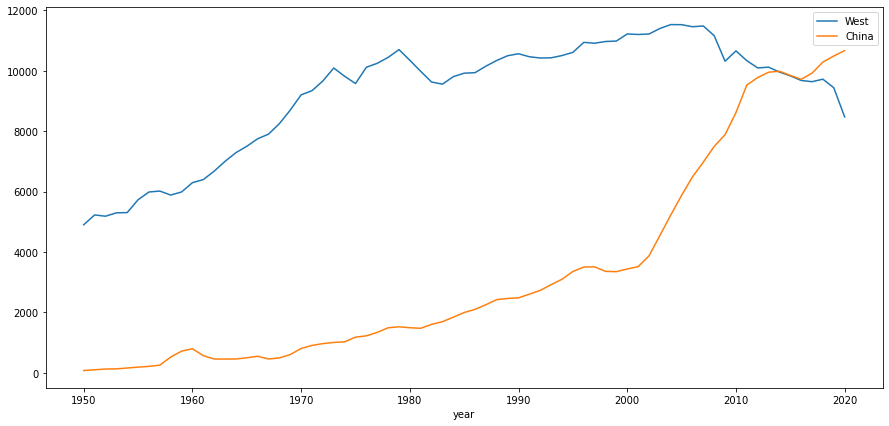

In [21]:
comp = pd.DataFrame({'West': west['West'], 'China': n_df['China']})
comp = comp.dropna()
comp.plot(figsize = (15, 7))

It's clear that China has surpassed the West as a whole. A causation of this is the [big migration](https://www.chinabusinessreview.com/40-years-of-us-china-commercial-relations/) of Western factories to China.

[Why China Is "The World's Factory"](https://www.investopedia.com/articles/investing/102214/why-china-worlds-factory.asp)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

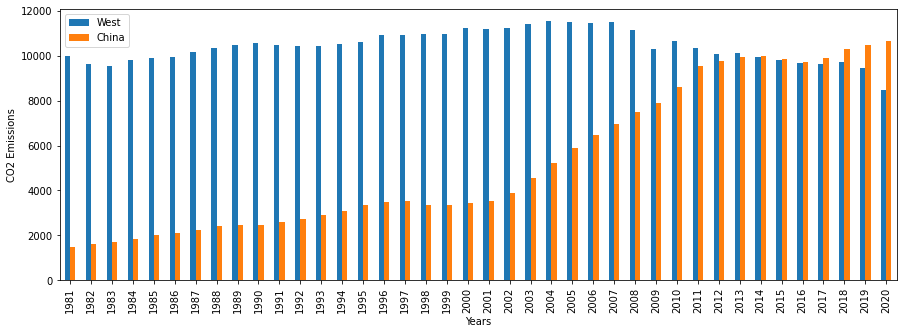

In [22]:
fig = comp[comp.index > 1980].plot.bar(legend=True, figsize=(15,5), ylabel= 'CO2 Emissions', xlabel='Years').figure
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

I think it's clear that despite the West's emissions drop, China singlehandedly reverses the progress. However, as we saw earlier, it's not only China as a country, but also the migration of the Western factories there.

<AxesSubplot:xlabel='year'>

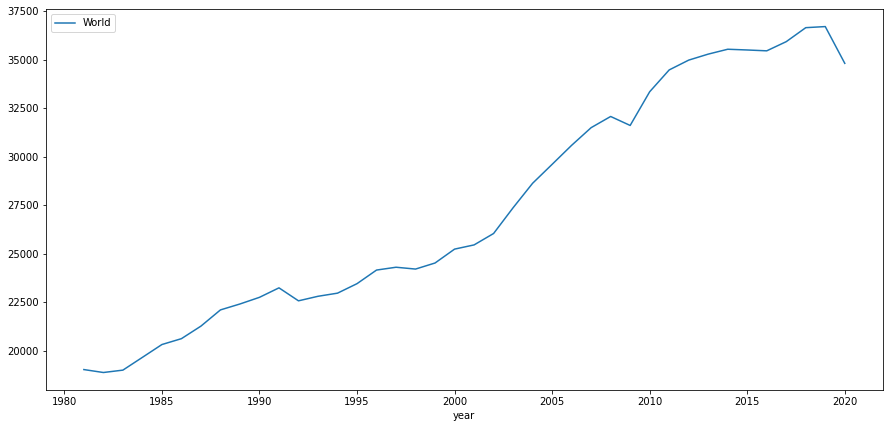

In [23]:
world = t_df(['World'])
world[world.index>1980].plot(figsize = (15, 7))

On world scale, the emissions ave had a steady increase with two interruptions. One in 1990s and the other in 2007. However, we see a stagnation in 2018-2019 and a drop in 2019-2020. Although we could say that the drop in 2019 happened due to the lockdowns in Asia in the last two months of 2019, 2018 is very good news.

Now, here comes the original question that we need to answer. Has the West droped its emissions or is it transferred?

I believe that it is very safe to say that emissions have been transferred to the devoloping world.

In the official [Chinese Data](http://meicmodel.org/?page_id=545&version=1_3&year=2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017&titleName=MEIC+v1.3&lang=en) made by Multi-resolution Emission Inventory for China of Tsinghua University, range from 2008 where the Western emissions fall begin, to 2017 and browsing by year, we can see an increase in all regions.

So, how much Western CO2 has been transferred? For this, we will use a the linear regression and the prediction will begin in 1997. That's because that's when the governments of the world started taking action. Although, the emissions don't start falling until 2007, that doesn't mean that they couldn't be more.

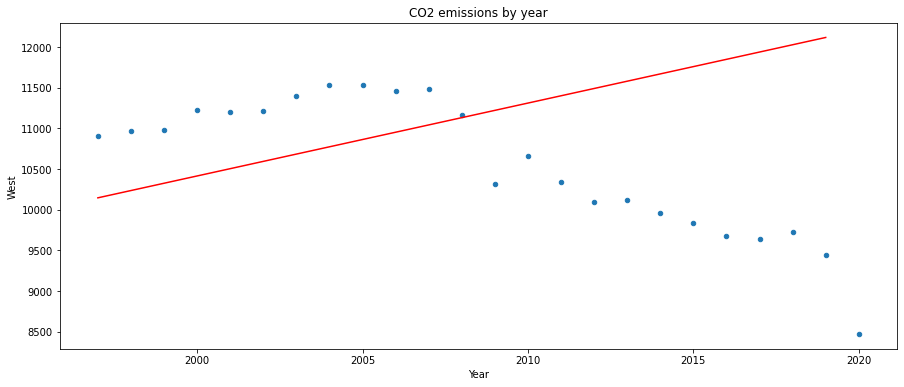

In [24]:
graph = pd.DataFrame({'West': west['West'], 'Year':west.index})
#fig= plt.subplots()
fig = graph[graph.index>1996].plot(kind='scatter', x='Year', y='West', figsize=(15,6))
plt.title('CO2 emissions by year')
a = linregress(graph['Year'], graph['West'])
x = pd.Series(np.arange(1997, 2020))
y = a.intercept + a.slope*x
plt.plot(x, y, 'r')

I believe that we could say that the area of the prediction line, the western CO2 line and the y axis is the maximum CO2 emissions that are transferred outside of the West.

Although we could include a lot more in the project, such as the shipping emissions, given the fact that ships now travel a lot more after the opening of the East and industry emissions, either there aren't enough data for that, or their databases aren't in my knowledge. 

All in all, I believe that we made a good general picture of the emissions transfer.